**Library Imports**

In [1]:
import pandas as pd
import io
import requests
import numpy as np
import os
import seaborn as sns

from scipy.stats import zscore

from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier

from matplotlib import pyplot
import matplotlib.pyplot as plot
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential, load_model

from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from sklearn.preprocessing import LabelEncoder
from IPython.display import display

from imblearn.over_sampling import SMOTE

import tensorflow as tf

Panda Preferences

In [2]:
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

Read CSV

In [3]:
df_train = pd.read_csv("../../../../../Datasets/Flows/train.csv")
display(df_train)

,duration,orig_bytes,resp_bytes,orig_pkts,orig_ip_bytes,resp_ip_bytes,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,fwd_pkts_per_sec,bwd_pkts_per_sec,flow_pkts_per_sec,down_up_ratio,fwd_header_size_tot,bwd_header_size_tot,fwd_PSH_flag_count,flow_ACK_flag_count,fwd_pkts_payload.min,fwd_pkts_payload.max,fwd_pkts_payload.tot,fwd_pkts_payload.avg,fwd_pkts_payload.std,bwd_pkts_payload.max,bwd_pkts_payload.tot,bwd_pkts_payload.avg,bwd_pkts_payload.std,flow_pkts_payload.min,flow_pkts_payload.max,flow_pkts_payload.tot,flow_pkts_payload.avg,flow_pkts_payload.std,fwd_iat.min,fwd_iat.max,fwd_iat.tot,fwd_iat.avg,fwd_iat.std,bwd_iat.min,bwd_iat.max,bwd_iat.tot,bwd_iat.avg,flow_iat.min,flow_iat.max,flow_iat.tot,flow_iat.avg,flow_iat.std,payload_bytes_per_second,fwd_subflow_pkts,bwd_subflow_pkts,fwd_subflow_bytes,bwd_subflow_bytes,fwd_bulk_bytes,active.min,active.max,active.tot,active.avg,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,bwd_last_window_size,traffic,history_originator,history_responder,proto_tcp,proto_udp,local_resp_F,local_resp_T,local_orig_T,fwd_header_size_min_0,fwd_header_size_min_8,fwd_header_size_min_20,fwd_header_size_min_24,fwd_header_size_min_32,fwd_header_size_min_40,fwd_header_size_max_0,fwd_header_size_max_8,fwd_header_size_max_20,fwd_header_size_max_24,fwd_header_size_max_32,fwd_header_size_max_36,fwd_header_size_max_40,fwd_header_size_max_44,flow_SYN_flag_count_0,flow_SYN_flag_count_1,flow_SYN_flag_count_2,flow_SYN_flag_count_3,flow_SYN_flag_count_4,flow_RST_flag_count_0,flow_RST_flag_count_1,flow_RST_flag_count_2,flow_RST_flag_count_3,flow_FIN_flag_count_0,flow_FIN_flag_count_1,flow_FIN_flag_count_2,flow_FIN_flag_count_3,flow_FIN_flag_count_4,conn_state_OTH,conn_state_REJ,conn_state_RSTOS0,conn_state_RSTR,conn_state_RSTRH,conn_state_S0,conn_state_S1,conn_state_SF,conn_state_SH,conn_state_SHR,bwd_PSH_flag_count_0,bwd_PSH_flag_count_1,bwd_PSH_flag_count_2,bwd_PSH_flag_count_3,bwd_PSH_flag_count_4,bwd_PSH_flag_count_5,bwd_header_size_min_0,bwd_header_size_min_8,bwd_header_size_min_20,bwd_header_size_min_24,bwd_header_size_min_32,bwd_header_size_min_36,bwd_header_size_min_40,bwd_header_size_max_0,bwd_header_size_max_8,bwd_header_size_max_20,bwd_header_size_max_24,bwd_header_size_max_32,bwd_header_size_max_36,bwd_header_size_max_40,bwd_header_size_max_44,bwd_header_size_max_52,resp_pkts_0,resp_pkts_1,is_attack
0,0.0036,-0.004033,0,-0.468417,-0.315391,1.138928,-0.455593,-0.080869,-0.587519,-0.098153,0,0.423015,0.423094,0.423084,0.189614,-0.076865,-0.566269,-0.082805,-0.086560,-0.418228,-0.296008,-0.056203,-0.307120,-0.290392,-0.412268,-0.480121,-0.517275,-0.296487,-0.350483,-0.296046,-0.058162,-0.327243,-0.293588,-0.400305,-0.544668,-0.573956,-0.509309,-0.324047,-0.405096,-0.432596,-0.456239,-0.435351,-0.027583,-0.541624,-0.578154,-0.525495,-0.546095,-0.054007,-0.067402,-0.465705,-0.055674,-0.550180,-0.011506,-0.578154,-0.578154,-0.578154,-0.578154,-0.344984,-0.360738,0.018485,-0.113698,netscan,1,1,1,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1
1,1.0658,-0.004033,0,-0.468417,-0.302472,-0.844209,-0.453680,-0.080869,-0.218469,-0.098153,0,-0.188617,-0.179541,-0.184092,2.928182,-0.074339,0.039640,-0.082805,-0.066354,-0.418228,-0.296008,-0.056203,-0.307120,-0.290392,-0.412268,-0.480121,-0.517275,-0.296487,-0.350483,-0.296046,-0.058162,-0.327243,-0.293588,-0.400305,-0.544668,-0.573956,-0.509309,-0.324047,-0.396514,-0.425762,-0.454189,-0.426995,-0.025780,-0.535821,-0.576418,-0.517839,-0.537879,-0.054007,-0.067402,0.100855,-0.055674,-0.550180,-0.011506,-0.576418,-0.576418,-0.576418,-0.576418,-0.371233,-0.336014,-0.223839,0.118904,rudeadyet,1,1,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1
2,0.0068,-0.004033,0,-0.468417,-0.315391,1.138928,-0.455605,-0.080869,-0.587519,-0.098153,0,0.866483,0.866727,0.866664,

In [4]:
df_test = pd.read_csv("../../../../../Datasets/Flows/test.csv")
display(df_test)

,duration,orig_bytes,resp_bytes,orig_pkts,orig_ip_bytes,resp_ip_bytes,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,fwd_pkts_per_sec,bwd_pkts_per_sec,flow_pkts_per_sec,down_up_ratio,fwd_header_size_tot,bwd_header_size_tot,fwd_PSH_flag_count,flow_ACK_flag_count,fwd_pkts_payload.min,fwd_pkts_payload.max,fwd_pkts_payload.tot,fwd_pkts_payload.avg,fwd_pkts_payload.std,bwd_pkts_payload.max,bwd_pkts_payload.tot,bwd_pkts_payload.avg,bwd_pkts_payload.std,flow_pkts_payload.min,flow_pkts_payload.max,flow_pkts_payload.tot,flow_pkts_payload.avg,flow_pkts_payload.std,fwd_iat.min,fwd_iat.max,fwd_iat.tot,fwd_iat.avg,fwd_iat.std,bwd_iat.min,bwd_iat.max,bwd_iat.tot,bwd_iat.avg,flow_iat.min,flow_iat.max,flow_iat.tot,flow_iat.avg,flow_iat.std,payload_bytes_per_second,fwd_subflow_pkts,bwd_subflow_pkts,fwd_subflow_bytes,bwd_subflow_bytes,fwd_bulk_bytes,active.min,active.max,active.tot,active.avg,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,bwd_last_window_size,traffic,history_originator,history_responder,proto_tcp,proto_udp,local_resp_F,local_resp_T,local_orig_T,fwd_header_size_min_0,fwd_header_size_min_8,fwd_header_size_min_20,fwd_header_size_min_24,fwd_header_size_min_32,fwd_header_size_min_40,fwd_header_size_max_0,fwd_header_size_max_8,fwd_header_size_max_20,fwd_header_size_max_24,fwd_header_size_max_32,fwd_header_size_max_36,fwd_header_size_max_40,fwd_header_size_max_44,flow_SYN_flag_count_0,flow_SYN_flag_count_1,flow_SYN_flag_count_2,flow_SYN_flag_count_3,flow_SYN_flag_count_4,flow_RST_flag_count_0,flow_RST_flag_count_1,flow_RST_flag_count_2,flow_RST_flag_count_3,flow_FIN_flag_count_0,flow_FIN_flag_count_1,flow_FIN_flag_count_2,flow_FIN_flag_count_3,flow_FIN_flag_count_4,conn_state_OTH,conn_state_REJ,conn_state_RSTOS0,conn_state_RSTR,conn_state_RSTRH,conn_state_S0,conn_state_S1,conn_state_SF,conn_state_SH,conn_state_SHR,bwd_PSH_flag_count_0,bwd_PSH_flag_count_1,bwd_PSH_flag_count_2,bwd_PSH_flag_count_3,bwd_PSH_flag_count_4,bwd_PSH_flag_count_5,bwd_header_size_min_0,bwd_header_size_min_8,bwd_header_size_min_20,bwd_header_size_min_24,bwd_header_size_min_32,bwd_header_size_min_36,bwd_header_size_min_40,bwd_header_size_max_0,bwd_header_size_max_8,bwd_header_size_max_20,bwd_header_size_max_24,bwd_header_size_max_32,bwd_header_size_max_36,bwd_header_size_max_40,bwd_header_size_max_44,bwd_header_size_max_52,resp_pkts_0,resp_pkts_1,is_attack
0,0.0130,-0.004033,0,-0.468417,-0.315391,1.138928,-0.455561,-0.080869,-0.587519,-0.098153,0,0.098590,0.098548,0.098576,0.189614,-0.076865,-0.566269,-0.082805,-0.086560,-0.418228,-0.296008,-0.056203,-0.307120,-0.290392,-0.412268,-0.480121,-0.517275,-0.296487,-0.350483,-0.296046,-0.058162,-0.327243,-0.293588,-0.400305,-0.544668,-0.573956,-0.509309,-0.324047,-0.405096,-0.432596,-0.456239,-0.435351,-0.026834,-0.541528,-0.578127,-0.525252,-0.546095,-0.054007,-0.067402,-0.465705,-0.055674,-0.550180,-0.011506,-0.578127,-0.578127,-0.578127,-0.578127,-0.344984,-0.360738,0.018485,-0.113698,netscan,1,1,1,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1
1,304.5026,-0.004029,0,0.171795,-0.011805,-0.844209,-0.455622,0.040416,-0.956568,0.040896,0,-0.197839,-0.197992,-0.197929,-2.548953,0.046908,-0.841683,0.056210,0.034676,-0.418228,-0.292785,-0.054735,-0.302456,-0.287079,-0.412268,-0.480121,-0.517275,-0.296487,-0.350483,-0.292824,-0.056694,-0.318003,-0.289188,-0.400110,1.596671,1.785677,0.433022,2.477037,-0.405096,-0.432596,-0.456239,-0.435351,-0.027169,1.550177,1.780321,1.233322,1.570542,-0.054007,-0.051145,-1.032266,-0.055379,-0.550180,-0.011506,1.780321,1.780321,1.780321,1.780321,-0.370681,-0.360738,-0.218742,-0.113698,normal,1,1,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,405.8051,-0.004028,0,0.385199,0.081854,-0.844209,2.279516,0.060630,4.579172,0.199809,5,-0.197741,-0.197893,-0.197831,0.189614,-0.046

---------------------------------------

**Create Model & Train Model**

In [5]:
df_train.groupby('traffic')['traffic'].count()

traffic
apachekiller     62397
arpspoofing         31
camoverflow          3
mqttmalaria       7032
netscan         342348
normal          325737
rudeadyet        61757
slowloris        15797
slowread          5005
Name: traffic, dtype: int64

In [6]:
df_train = df_train.drop('is_attack', axis=1)
df_test = df_test.drop('is_attack', axis=1)

In [7]:
x_columns = df_train.columns.drop('traffic')

le = LabelEncoder()
le.fit(df_train["traffic"].values)

x = df_train[x_columns].values
y = df_train["traffic"].values
y = le.transform(y)

In [8]:
x_columns_val = df_test.columns.drop('traffic')

le = LabelEncoder()
le.fit(df_test["traffic"].values)

x_val = df_test[x_columns].values
y_val = df_test["traffic"].values
y_val = le.transform(y_val)

In [9]:
# Split into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42, stratify=y)

In [10]:
x_test.shape,y_test.shape

((205027, 130), (205027,))

In [11]:
x_train.shape,y_train.shape

((615080, 130), (615080,))

In [12]:
# Define the model
model = Sequential()
model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

monitor = tf.keras.callbacks.ReduceLROnPlateau(monitor="loss",factor=0.5,mode="min",patience=10,verbose=1,min_lr=1e-7)
checkpoint = ModelCheckpoint('Best_Model.h5', monitor='val_loss', save_best_only=True)

# Train the model
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=300, batch_size=512, callbacks=[monitor, checkpoint])

Train on 615080 samples, validate on 205027 samples
Epoch 1/300
615080/615080 [==============================] - 4s 6us/sample - loss: 0.5892 - accuracy: 0.8569 - val_loss: 0.1800 - val_accuracy: 0.9568
Epoch 2/300
615080/615080 [==============================] - 3s 5us/sample - loss: 0.2620 - accuracy: 0.9418 - val_loss: 0.1567 - val_accuracy: 0.9578
Epoch 3/300
615080/615080 [==============================] - 3s 5us/sample - loss: 0.2159 - accuracy: 0.9491 - val_loss: 0.1413 - val_accuracy: 0.9589
Epoch 4/300
615080/615080 [==============================] - 3s 5us/sample - loss: 0.1921 - accuracy: 0.9525 - val_loss: 0.1308 - val_accuracy: 0.9600
Epoch 5/300
615080/615080 [==============================] - 3s 5us/sample - loss: 0.1773 - accuracy: 0.9548 - val_loss: 0.1237 - val_accuracy: 0.9615
Epoch 6/300
615080/615080 [==============================] - 3s 5us/sample - loss: 0.1664 - accuracy: 0.9564 - val_loss: 0.1147 - val_accuracy: 0.9620
Epoch 7/300
615080/615080 [===============

615080/615080 [==============================] - 4s 6us/sample - loss: 0.0483 - accuracy: 0.9877 - val_loss: 0.0166 - val_accuracy: 0.9957
Epoch 55/300
615080/615080 [==============================] - 4s 7us/sample - loss: 0.0454 - accuracy: 0.9886 - val_loss: 0.0159 - val_accuracy: 0.9955
Epoch 56/300
615080/615080 [==============================] - 9s 14us/sample - loss: 0.0423 - accuracy: 0.9896 - val_loss: 0.0171 - val_accuracy: 0.9964
Epoch 57/300
615080/615080 [==============================] - 9s 14us/sample - loss: 0.0418 - accuracy: 0.9897 - val_loss: 0.0200 - val_accuracy: 0.9957
Epoch 58/300
615080/615080 [==============================] - 8s 12us/sample - loss: 0.0403 - accuracy: 0.9899 - val_loss: 0.0145 - val_accuracy: 0.9956
Epoch 59/300
615080/615080 [==============================] - 7s 12us/sample - loss: 0.0405 - accuracy: 0.9900 - val_loss: 0.0162 - val_accuracy: 0.9967
Epoch 60/300
615080/615080 [==============================] - 9s 14us/sample - loss: 0.0406 - acc

Epoch 108/300
615080/615080 [==============================] - 4s 7us/sample - loss: 0.0304 - accuracy: 0.9929 - val_loss: 0.0160 - val_accuracy: 0.9965
Epoch 109/300
615080/615080 [==============================] - 4s 6us/sample - loss: 0.0299 - accuracy: 0.9930 - val_loss: 0.0160 - val_accuracy: 0.9963
Epoch 110/300
615080/615080 [==============================] - 4s 6us/sample - loss: 0.0294 - accuracy: 0.9930 - val_loss: 0.0120 - val_accuracy: 0.9972
Epoch 111/300
615080/615080 [==============================] - 4s 6us/sample - loss: 0.0294 - accuracy: 0.9931 - val_loss: 0.0116 - val_accuracy: 0.9967
Epoch 112/300
615080/615080 [==============================] - 4s 6us/sample - loss: 0.0276 - accuracy: 0.9935 - val_loss: 0.0127 - val_accuracy: 0.9972
Epoch 113/300
615080/615080 [==============================] - 3s 5us/sample - loss: 0.0283 - accuracy: 0.9934 - val_loss: 0.0127 - val_accuracy: 0.9967
Epoch 114/300
615080/615080 [==============================] - 3s 5us/sample - los

615080/615080 [==============================] - 3s 5us/sample - loss: 0.0180 - accuracy: 0.9958 - val_loss: 0.0082 - val_accuracy: 0.9978
Epoch 160/300
615080/615080 [==============================] - 3s 5us/sample - loss: 0.0179 - accuracy: 0.9959 - val_loss: 0.0075 - val_accuracy: 0.9982
Epoch 161/300
615080/615080 [==============================] - 3s 5us/sample - loss: 0.0178 - accuracy: 0.9959 - val_loss: 0.0079 - val_accuracy: 0.9979
Epoch 162/300
615080/615080 [==============================] - 3s 6us/sample - loss: 0.0180 - accuracy: 0.9958 - val_loss: 0.0076 - val_accuracy: 0.9982
Epoch 163/300
615080/615080 [==============================] - 4s 6us/sample - loss: 0.0179 - accuracy: 0.9958 - val_loss: 0.0082 - val_accuracy: 0.9982
Epoch 164/300
615080/615080 [==============================] - 6s 9us/sample - loss: 0.0177 - accuracy: 0.9960 - val_loss: 0.0073 - val_accuracy: 0.9984
Epoch 165/300
615080/615080 [==============================] - 5s 9us/sample - loss: 0.0181 - ac

615080/615080 [==============================] - 3s 5us/sample - loss: 0.0153 - accuracy: 0.9966 - val_loss: 0.0075 - val_accuracy: 0.9980
Epoch 211/300
615080/615080 [==============================] - 3s 5us/sample - loss: 0.0153 - accuracy: 0.9966 - val_loss: 0.0072 - val_accuracy: 0.9983
Epoch 212/300
615080/615080 [==============================] - 3s 5us/sample - loss: 0.0150 - accuracy: 0.9967 - val_loss: 0.0073 - val_accuracy: 0.9981
Epoch 213/300
615080/615080 [==============================] - 3s 5us/sample - loss: 0.0153 - accuracy: 0.9966 - val_loss: 0.0071 - val_accuracy: 0.9983
Epoch 214/300
615080/615080 [==============================] - 3s 5us/sample - loss: 0.0149 - accuracy: 0.9967 - val_loss: 0.0075 - val_accuracy: 0.9984
Epoch 215/300
615080/615080 [==============================] - 3s 5us/sample - loss: 0.0153 - accuracy: 0.9967 - val_loss: 0.0070 - val_accuracy: 0.9985
Epoch 216/300
615080/615080 [==============================] - 3s 5us/sample - loss: 0.0152 - ac

615080/615080 [==============================] - 5s 9us/sample - loss: 0.0141 - accuracy: 0.9970 - val_loss: 0.0065 - val_accuracy: 0.9985
Epoch 261/300
615080/615080 [==============================] - 6s 9us/sample - loss: 0.0141 - accuracy: 0.9969 - val_loss: 0.0063 - val_accuracy: 0.9986
Epoch 262/300
615080/615080 [==============================] - 6s 9us/sample - loss: 0.0139 - accuracy: 0.9970 - val_loss: 0.0065 - val_accuracy: 0.9985
Epoch 263/300
615080/615080 [==============================] - 6s 9us/sample - loss: 0.0139 - accuracy: 0.9970 - val_loss: 0.0061 - val_accuracy: 0.9986
Epoch 264/300
615080/615080 [==============================] - 5s 9us/sample - loss: 0.0139 - accuracy: 0.9970 - val_loss: 0.0064 - val_accuracy: 0.9986
Epoch 265/300
615080/615080 [==============================] - 5s 9us/sample - loss: 0.0139 - accuracy: 0.9970 - val_loss: 0.0064 - val_accuracy: 0.9985
Epoch 266/300
615080/615080 [==============================] - 4s 6us/sample - loss: 0.0139 - ac

In [13]:
# Load the best-saved model
best_model = load_model('Best_Model.h5')

# Evaluate the best-saved model
y_pred = best_model.predict(x_val)
y_pred_classes = np.argmax(y_pred, axis=1)
acc = accuracy_score(y_val, y_pred_classes)
print('')
print('Test accuracy:', acc)


Test accuracy: 0.9987013937154772


In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               67072     
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               3

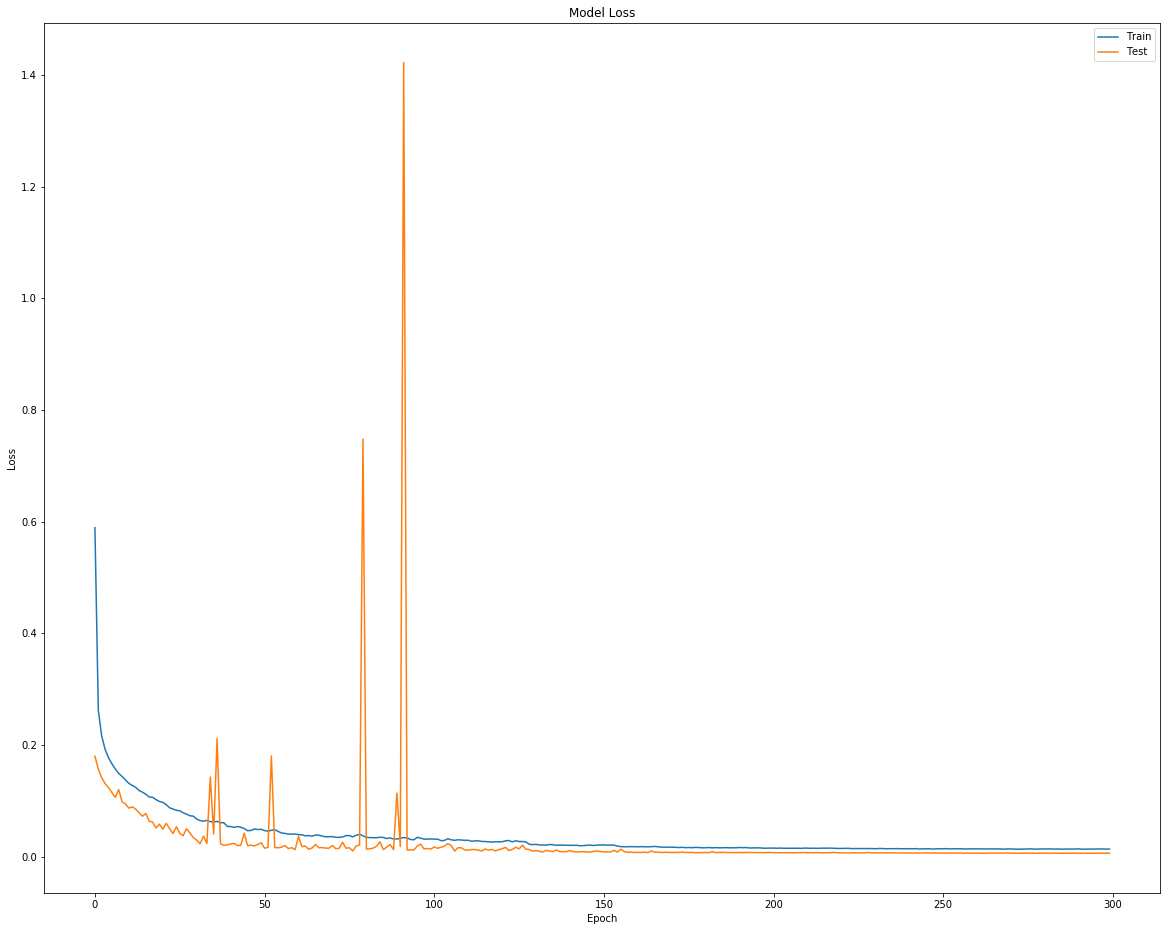

In [15]:
fig, ax = plt.subplots(figsize=(20, 16))

ax.plot(history.history['loss'], label='train')
ax.plot(history.history['val_loss'], label='test')
ax.set_title('Model Loss')
ax.set_ylabel('Loss')
ax.set_xlabel('Epoch')
ax.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [16]:
pred = model.predict(x_val)

In [17]:
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import classification_report

def calculate_metrics(modelName, yTrue, yPred, average='binary'):
    """
    Calculate and print the performance metrics of a classification model.
    
    Parameters:
    modelName (str): The name of the classification model.
    yTrue (array-like): The true labels.
    yPred (array-like): The predicted labels.
    average (str or None, optional): The averaging method to use for multi-class classification. One of 
        {'micro', 'macro', 'weighted', 'binary'} or None (default: 'binary'). If None, only binary 
        classification metrics will be computed.
    
    Raises:
    ValueError: If `average` is not one of {'micro', 'macro', 'weighted', 'binary'} or None.
    
    """
    # Check if average parameter is valid
    if average != 'micro' and average != 'macro' and average != 'weighted' and average != 'binary' and average != None:
        print("Average must be one of this options: {‘micro’, ‘macro’, ‘samples’, ‘weighted’, ‘binary’} or None, default=’binary’")
        return
    
    # Prints the name of the model and calculate accuracy and precision
    print(f"--- Performance of {modelName} ---")
    acc = accuracy_score(y_true = yTrue, y_pred = yPred)
    precision = precision_score(y_true = yTrue, y_pred = yPred, average = average)
    print(f'Accuracy : {np.round(acc*100,2)}%\nPrecision: {np.round(precision*100,2)}%')
    
    # Calculates and print recall and F1-score
    f1 = f1_score(y_true = yTrue, y_pred = yPred, average = average)
    recall = recall_score(y_true = yTrue, y_pred = yPred, average = average)
    print(f'Recall: {np.round(recall*100,2)}%\nF1-score: {np.round(f1*100,2)}%')
    
    #auc_sklearn = roc_auc_score(y_true = yTrue, y_score = yPred, average = average)
    #print(f'Roc auc: {np.round(auc_sklearn*100,2)}%')
    
    # Calculates and prints balanced accuracy and classification report
    print(f"Balanced accuracy: {np.round(balanced_accuracy_score(yTrue, yPred)*100,2)}%")
    print(f"Classification report:\n{classification_report(yTrue, yPred)}")

In [18]:
pred_labels = np.argmax(pred, axis=1)

calculate_metrics("Neural Network", y_val, pred_labels, average='weighted')

--- Performance of Neural Network ---
Accuracy : 99.87%
Precision: 99.87%
Recall: 99.87%
F1-score: 99.87%


/project/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Balanced accuracy: 77.28%
Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20970
           1       0.00      0.00      0.00        12
           2       0.00      0.00      0.00         2
           3       1.00      0.98      0.99      2302
           4       1.00      1.00      1.00    114262
           5       1.00      1.00      1.00    108580
           6       1.00      0.99      0.99     20351
           7       0.97      0.98      0.98      5252
           8       0.99      1.00      1.00      1639

    accuracy                           1.00    273370
   macro avg       0.77      0.77      0.77    273370
weighted avg       1.00      1.00      1.00    273370



/project/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/project/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/project/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-------------------------------------

**Result Plots**

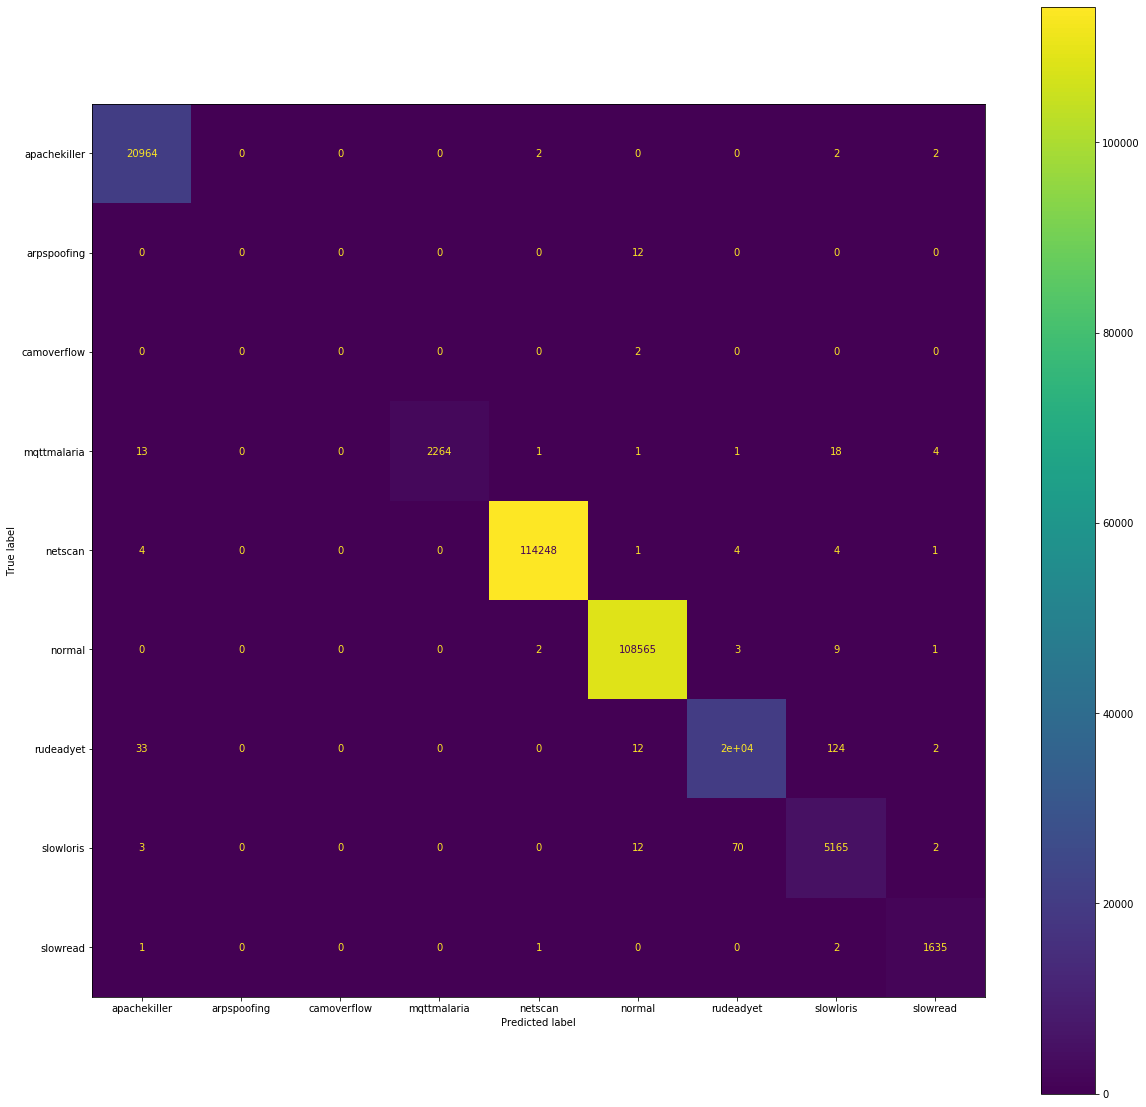

In [19]:
original_labels_list = le.classes_

# Compute confusion matrix
pred_labels = np.argmax(pred, axis=1)
cm = confusion_matrix(y_val, pred_labels)

# Display confusion matrix
cmd = ConfusionMatrixDisplay(confusion_matrix = cm,display_labels= original_labels_list)
fig, ax = plt.subplots(figsize=(20, 20))
cmd.plot(ax=ax)

In [20]:
# Usage of ExtraTreesClassifier for feature selection
extra_tree_forest = ExtraTreesClassifier(n_estimators = 5, criterion ='entropy', max_features = 2)
extra_tree_forest.fit(x, y)
feature_importance = extra_tree_forest.feature_importances_
feature_importance_normalized = np.std([tree.feature_importances_ for tree in  extra_tree_forest.estimators_], axis = 0)

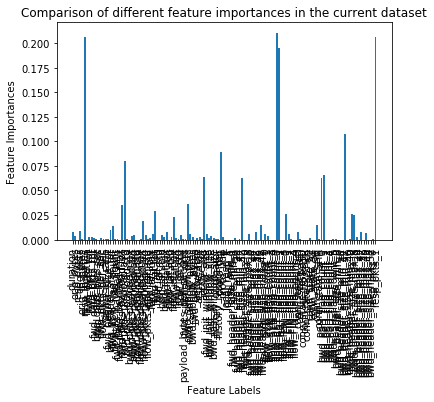

In [21]:
# Plor for the ExtraTreesClassifier output
plot.bar(x_columns, feature_importance_normalized)
plot.xlabel('Feature Labels')
plot.ylabel('Feature Importances')
plot.title('Comparison of different feature importances in the current dataset')
plot.xticks(rotation = 90)

# Plot size
plot.rcParams["figure.figsize"] = (70, 40)

plot.show()

## 